**Assignment 2 Solutions by Aritra Ambudh Dutta, Roll No. 230191. Submitted on 14th February 2025**

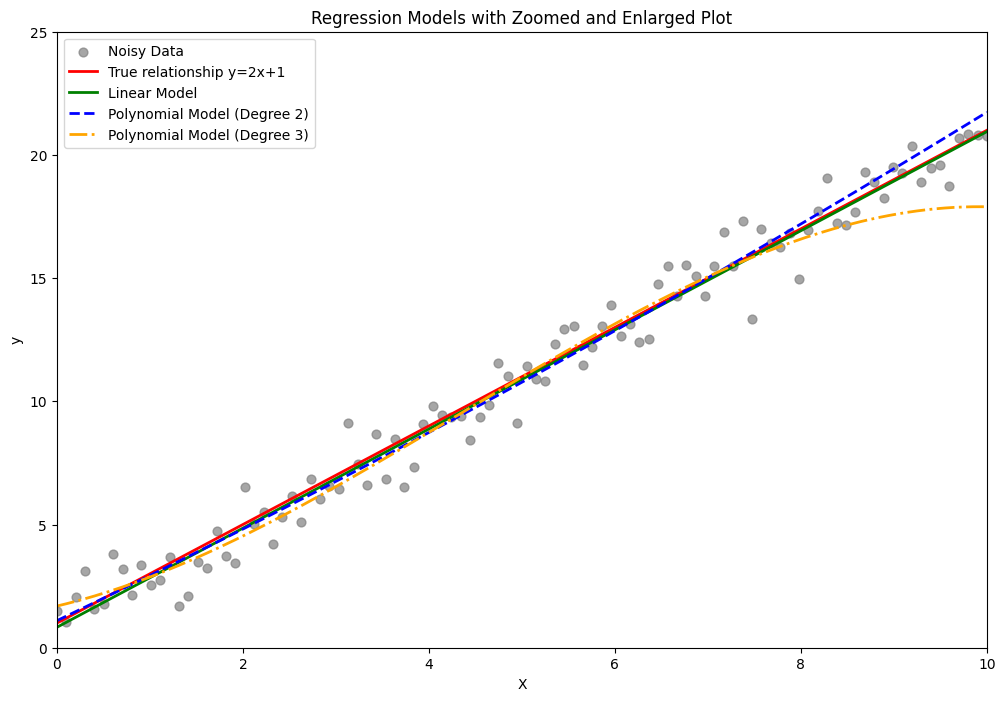

Mean Squared Error (Linear): 0.4568056974827008
Mean Squared Error (Polynomial Degree 2): 0.7530277626024064
Mean Squared Error (Polynomial Degree 3): 3.3467685731271275


In [28]:
'''
Assignment 2
Question 8
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 100 samples following the model y = 2x + 1 with Gaussian noise
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y_true = 2 * X + 1
noise = np.random.normal(0, 1, X.shape)
y = y_true + noise

# Split the data into training (first 80 samples) and testing (last 20 samples)
X_train = X[:80]
y_train = y[:80]
X_test = X[80:]
y_test = y[80:]

# ----- Linear Regression -----
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = np.mean((y_test - y_pred_linear)**2)

# ----- Polynomial Regression (Degree 2) -----
# Create polynomial features manually: [x, x^2]
X_train_poly2 = np.hstack([X_train, X_train**2])
X_test_poly2 = np.hstack([X_test, X_test**2])
poly2_model = LinearRegression()
poly2_model.fit(X_train_poly2, y_train)
y_pred_poly2 = poly2_model.predict(X_test_poly2)
mse_poly2 = np.mean((y_test - y_pred_poly2)**2)

# ----- Polynomial Regression (Degree 3) -----
# Create polynomial features manually: [x, x^2, x^3]
X_train_poly3 = np.hstack([X_train, X_train**2, X_train**3])
X_test_poly3 = np.hstack([X_test, X_test**2, X_test**3])
poly3_model = LinearRegression()
poly3_model.fit(X_train_poly3, y_train)
y_pred_poly3 = poly3_model.predict(X_test_poly3)
mse_poly3 = np.mean((y_test - y_pred_poly3)**2)

# ----- Plotting -----
X_plot = np.linspace(0, 10, 200).reshape(-1, 1)
y_true_plot = 2 * X_plot + 1  # True function

# Predictions for each fitted model
y_plot_linear = linear_model.predict(X_plot)
X_plot_poly2 = np.hstack([X_plot, X_plot**2])
y_plot_poly2 = poly2_model.predict(X_plot_poly2)
X_plot_poly3 = np.hstack([X_plot, X_plot**2, X_plot**3])
y_plot_poly3 = poly3_model.predict(X_plot_poly3)

plt.figure(figsize=(12, 8))
plt.scatter(X, y, label='Noisy Data', color='gray', alpha=0.7, s=40)

plt.plot(X_plot, y_true_plot, color='red', linestyle='-', label='True relationship y=2x+1', linewidth=2)

plt.plot(X_plot, y_plot_linear, color='green', linestyle='-', label='Linear Model', linewidth=2)
plt.plot(X_plot, y_plot_poly2, color='blue', linestyle='--', label='Polynomial Model (Degree 2)', linewidth=2)
plt.plot(X_plot, y_plot_poly3, color='orange', linestyle='-.', label='Polynomial Model (Degree 3)', linewidth=2)

plt.xlim(0, 10)
plt.ylim(0, 25)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression Models with Zoomed and Enlarged Plot')
plt.legend()
plt.show()

print("Mean Squared Error (Linear):", mse_linear)
print("Mean Squared Error (Polynomial Degree 2):", mse_poly2)
print("Mean Squared Error (Polynomial Degree 3):", mse_poly3)



For Learning Rate 0.01
Final Weights (MSE): [-0.0119288   0.00530508 -0.00431229]
Final Weights (Log-Likelihood): [-0.04687704  0.02108314 -0.01723465]


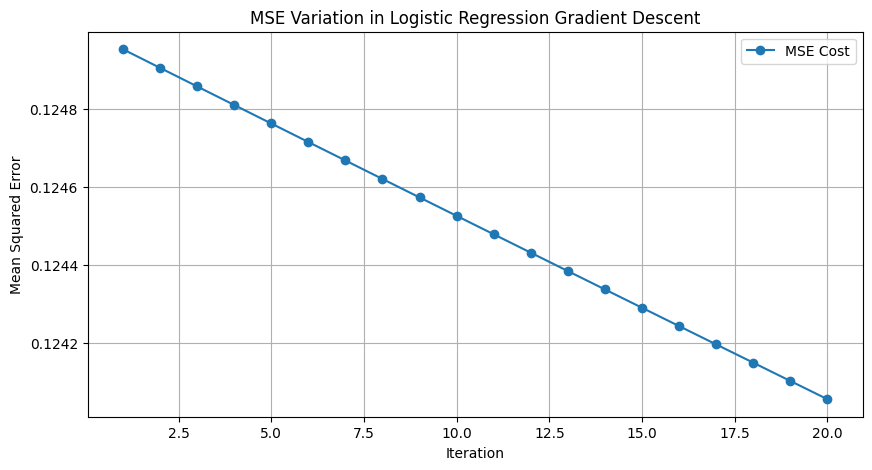

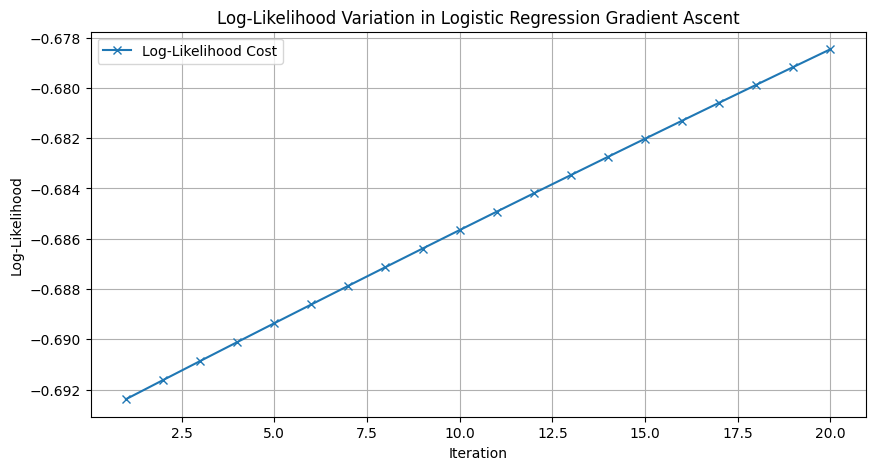

For Learning Rate 0.05
Final Weights (MSE): [-0.05822662  0.02628727 -0.02153149]
Final Weights (Log-Likelihood): [-0.21358772  0.10199359 -0.08562629]


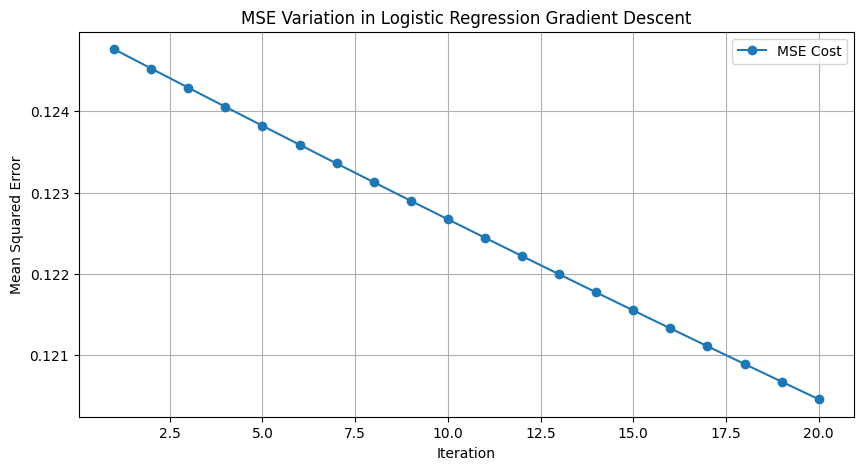

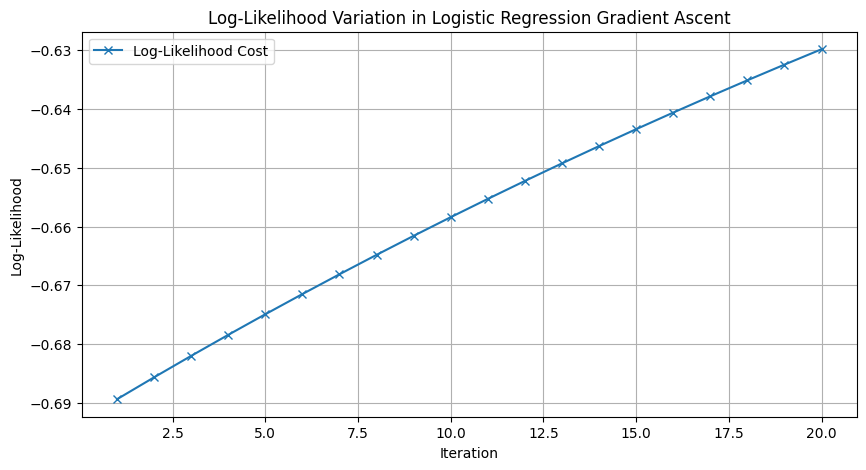

In [29]:
'''
Assignment 2
Question 9
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('A2_P2.csv')
X = data[['Feature 1', 'Feature 2']].values
y = data['Output'].values

# intercept (bias) term added to the features
X = np.hstack((np.ones((X.shape[0], 1)), X))

scaler = StandardScaler()
X[:, 1:] = scaler.fit_transform(X[:, 1:])

# sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Mean Squared Error (MSE) cost function
def mse_cost(X, y, weights):
    m = len(y)
    predictions = sigmoid(X.dot(weights))
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

# Log-Likelihood cost function
def log_likelihood(X, y, weights):
    m = len(y)
    predictions = sigmoid(X.dot(weights))
    epsilon = 1e-15
    return np.sum(y * np.log(predictions + epsilon) + (1 - y) * np.log(1 - predictions + epsilon)) / m

# Gradient Descent for MSE
def gradient_descent_mse(X, y, learning_rate, iterations):
    m, n = X.shape
    weights = np.zeros(n)
    cost_history = []

    for i in range(iterations):
        predictions = sigmoid(X.dot(weights))
        error = predictions - y
        gradient = (1 / m) * X.T.dot(error * predictions * (1 - predictions))
        weights -= learning_rate * gradient
        cost_history.append(mse_cost(X, y, weights))

    return weights, cost_history

# Gradient Ascent for Log-Likelihood
def gradient_ascent_log_likelihood(X, y, learning_rate, iterations):
    m, n = X.shape
    weights = np.zeros(n)
    cost_history = []

    for i in range(iterations):
        predictions = sigmoid(X.dot(weights))
        error = y - predictions
        gradient = (1 / m) * X.T.dot(error)
        weights += learning_rate * gradient
        cost_history.append(log_likelihood(X, y, weights))

    return weights, cost_history

print("For Learning Rate 0.01")
# Parameters for gradient methods
learning_rate = 0.01
iterations = 20

# Gradient Descent for MSE
weights_mse, mse_cost_history = gradient_descent_mse(X, y, learning_rate, iterations)

# Gradient Ascent for Log-Likelihood
weights_log_likelihood, log_likelihood_cost_history = gradient_ascent_log_likelihood(X, y, learning_rate, iterations)

# final weights for both methods
print("Final Weights (MSE):", weights_mse)
print("Final Weights (Log-Likelihood):", weights_log_likelihood)

# cost variation for MSE
plt.figure(figsize=(10, 5))
plt.plot(range(1, iterations + 1), mse_cost_history, marker='o', label='MSE Cost')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("MSE Variation in Logistic Regression Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()

# cost variation for Log-Likelihood
plt.figure(figsize=(10, 5))
plt.plot(range(1, iterations + 1), log_likelihood_cost_history, marker='x', label='Log-Likelihood Cost')
plt.xlabel("Iteration")
plt.ylabel("Log-Likelihood")
plt.title("Log-Likelihood Variation in Logistic Regression Gradient Ascent")
plt.legend()
plt.grid(True)
plt.show()




print("For Learning Rate 0.05")
# Parameters for gradient methods
learning_rate = 0.05
iterations = 20

# Gradient Descent for MSE
weights_mse, mse_cost_history = gradient_descent_mse(X, y, learning_rate, iterations)

# Gradient Ascent for Log-Likelihood
weights_log_likelihood, log_likelihood_cost_history = gradient_ascent_log_likelihood(X, y, learning_rate, iterations)

# final weights for both methods
print("Final Weights (MSE):", weights_mse)
print("Final Weights (Log-Likelihood):", weights_log_likelihood)

# cost variation for MSE
plt.figure(figsize=(10, 5))
plt.plot(range(1, iterations + 1), mse_cost_history, marker='o', label='MSE Cost')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("MSE Variation in Logistic Regression Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()

# cost variation for Log-Likelihood
plt.figure(figsize=(10, 5))
plt.plot(range(1, iterations + 1), log_likelihood_cost_history, marker='x', label='Log-Likelihood Cost')
plt.xlabel("Iteration")
plt.ylabel("Log-Likelihood")
plt.title("Log-Likelihood Variation in Logistic Regression Gradient Ascent")
plt.legend()
plt.grid(True)
plt.show()


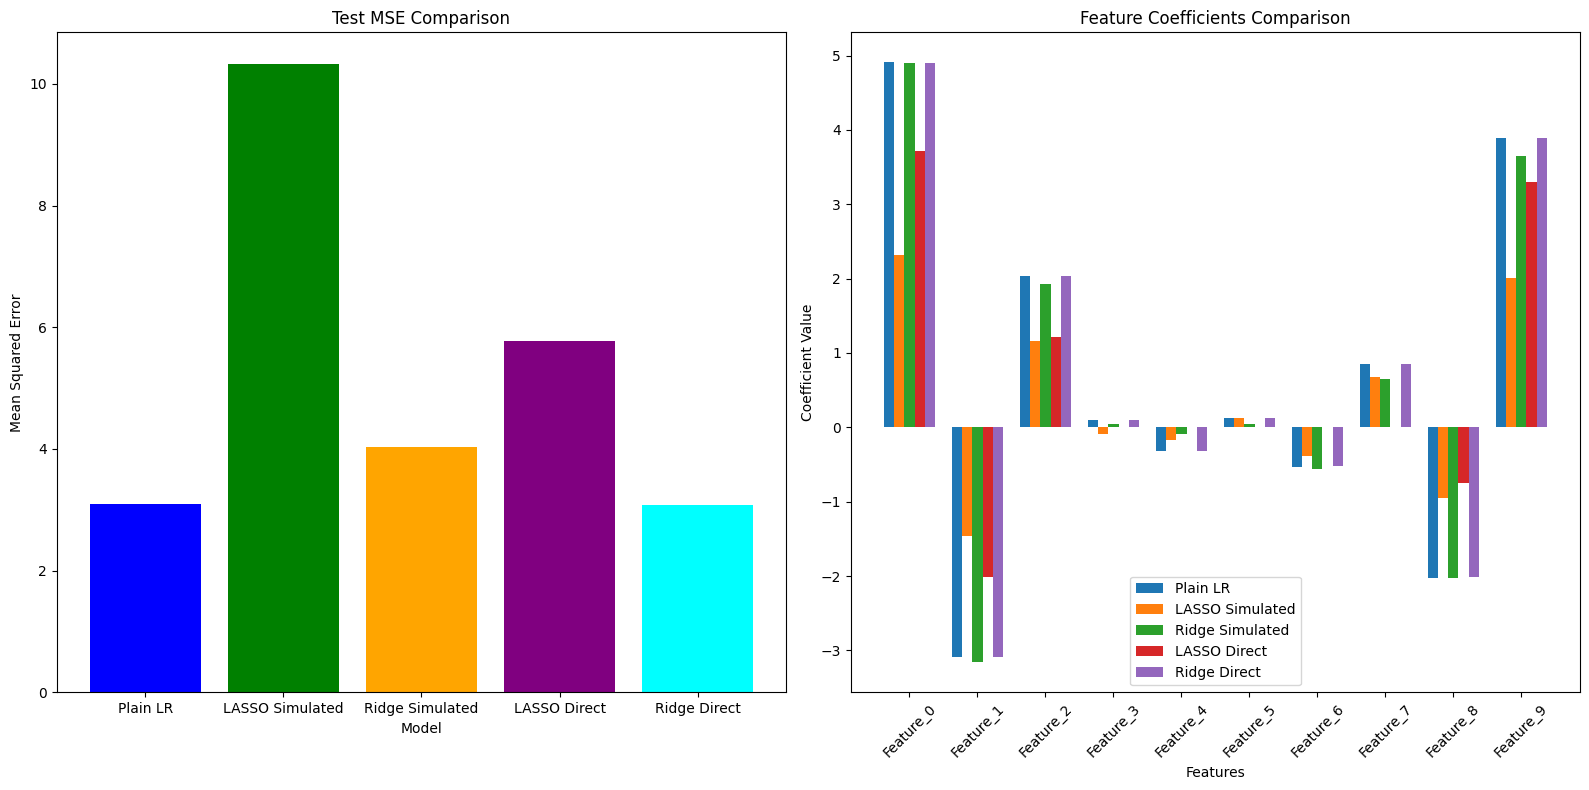

MSE for Plain Linear Regression: 3.0888005515078154
MSE for LASSO Simulated: 10.329378035090082
MSE for Ridge Simulated: 4.0342685215303735
MSE for LASSO Direct: 5.769614942209129
MSE for Ridge Direct: 3.077998520471075


In [30]:
'''
Assignment 2
Question 10
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge

data = pd.read_csv("A2_P3.csv")

# Split features and target variable
X = data.iloc[:, :-1].values  # Features as numpy array
y = data.iloc[:, -1].values   # Target variable

# split dataset into training (80%) and testing (20%) sets
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# ----- Baseline: Plain Linear Regression -----
lr_plain = LinearRegression()
lr_plain.fit(X_train, y_train)
y_pred_lr_plain = lr_plain.predict(X_test)
mse_lr_plain = np.mean((y_test - y_pred_lr_plain)**2)
coef_lr_plain = lr_plain.coef_

# -----Manually Simulated Regularization using LinearRegression -----
# Simulated LASSO: Transform features by adding 1.0 * sign(X)
lasso_sim = LinearRegression()
lasso_sim.fit(X_train + 1.0 * np.sign(X_train), y_train)
y_pred_lasso_sim = lasso_sim.predict(X_test + 1.0 * np.sign(X_test))
mse_lasso_sim = np.mean((y_test - y_pred_lasso_sim)**2)
coef_lasso_sim = lasso_sim.coef_

# Simulated Ridge: Transform features by adding 0.1 * (X^2)
ridge_sim = LinearRegression()
ridge_sim.fit(X_train + 0.1 * X_train**2, y_train)
y_pred_ridge_sim = ridge_sim.predict(X_test + 0.1 * X_test**2)
mse_ridge_sim = np.mean((y_test - y_pred_ridge_sim)**2)
coef_ridge_sim = ridge_sim.coef_

# ----- Direct Regularization using sklearn modules -----
# Direct LASSO
lasso_direct = Lasso(alpha=1.0, max_iter=10000)
lasso_direct.fit(X_train, y_train)
y_pred_lasso_direct = lasso_direct.predict(X_test)
mse_lasso_direct = np.mean((y_test - y_pred_lasso_direct)**2)
coef_lasso_direct = lasso_direct.coef_

# Direct Ridge
ridge_direct = Ridge(alpha=0.1)
ridge_direct.fit(X_train, y_train)
y_pred_ridge_direct = ridge_direct.predict(X_test)
mse_ridge_direct = np.mean((y_test - y_pred_ridge_direct)**2)
coef_ridge_direct = ridge_direct.coef_

# ----- Plotting Results -----
models = ['Plain LR', 'LASSO Simulated', 'Ridge Simulated', 'LASSO Direct', 'Ridge Direct']
mses = [mse_lr_plain, mse_lasso_sim, mse_ridge_sim, mse_lasso_direct, mse_ridge_direct]

plt.figure(figsize=(16, 8))

# Subplot 1: Bar plot of MSE for all models
plt.subplot(1, 2, 1)
plt.bar(models, mses, color=['blue', 'green', 'orange', 'purple', 'cyan'])
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Test MSE Comparison')

# Subplot 2: Bar plot for feature coefficients (weights)
n_features = X.shape[1]
x_axis = np.arange(n_features)
bar_width = 0.15

plt.subplot(1, 2, 2)
plt.bar(x_axis - 2*bar_width, coef_lr_plain, width=bar_width, label='Plain LR')
plt.bar(x_axis - bar_width, coef_lasso_sim, width=bar_width, label='LASSO Simulated')
plt.bar(x_axis, coef_ridge_sim, width=bar_width, label='Ridge Simulated')
plt.bar(x_axis + bar_width, coef_lasso_direct, width=bar_width, label='LASSO Direct')
plt.bar(x_axis + 2*bar_width, coef_ridge_direct, width=bar_width, label='Ridge Direct')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Coefficients Comparison')
plt.xticks(x_axis, [f'Feature_{i}' for i in range(n_features)], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# Printing MSE values for clarity
print("MSE for Plain Linear Regression:", mse_lr_plain)
print("MSE for LASSO Simulated:", mse_lasso_sim)
print("MSE for Ridge Simulated:", mse_ridge_sim)
print("MSE for LASSO Direct:", mse_lasso_direct)
print("MSE for Ridge Direct:", mse_ridge_direct)
